In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

### Empirical Distribution of a Statistic ###
The Law of Averages implies that with high probability, the empirical distribution of a large random sample will resemble the distribution of the population from which the sample was drawn.

The resemblance is visible in two histograms: the empirical histogram of a large random sample is likely to resemble the histogram of the population.

As a reminder, here is the histogram of the delays of all the flights in `united`, and an empirical histogram of the delays of a random sample of 1,000 of these flights.

In [2]:
united = Table.read_table('united_summer2015.csv')

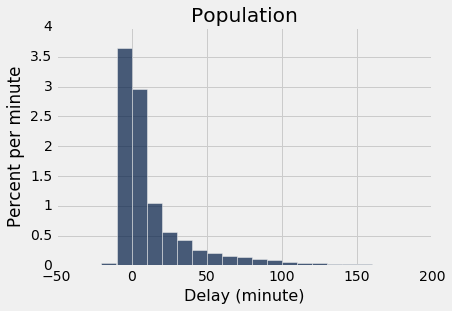

In [3]:
delay_bins = np.arange(-20, 201, 10)
united.select('Delay').hist(bins = delay_bins, unit = 'minute')
plots.title('Population');

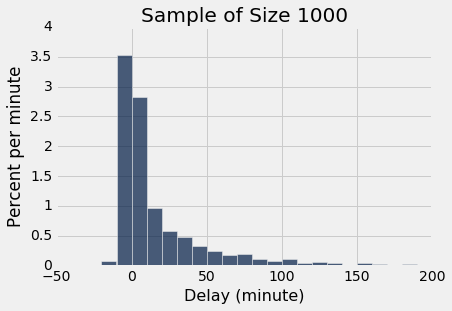

In [5]:
sample_1000 = united.sample(1000)
sample_1000.select('Delay').hist(bins = delay_bins, unit = 'minute')
plots.title('Sample of Size 1000');

The two histograms clearly resemble each other, though they are not identical. 

### Parameter ###
Frequently, we are interested in numerical quantities associated with a population.
- In a population of voters, what percent will vote for Candidate A?
- In a population of Facebook users, what is the largest number of Facebook friends that the users have?
- In a population of United flights, what is the median departure delay?

Numerical quantities associated with a population are called *parameters*. For the population of flights in `united`, we know the value of the parameter "median delay":

In [12]:
np.median(united.column('Delay'))

2.0

The `NumPy` function `median` returns the median (half-way point) of an array. Among all the flights in `united`, the median delay was 2 minutes. That is, about 50% of flights in the population had delays of 2 or fewer minutes:

In [6]:
united.where('Delay', are.below_or_equal_to(2)).num_rows/united.num_rows

0.5018444846292948

Half of all flights left no more than 2 minutes after their scheduled departure time. That's a very short delay!  

**Note.** The percent isn't exactly 50 because of "ties," that is, flights that had delays of exactly 2 minutes. There were 480 such flights. Ties are quite common in data sets, and we will not worry about them in this course.

In [18]:
united.where('Delay', are.equal_to(2)).num_rows

480

### Statistic ###
In many situations, we will be interested in figuring out the value of an unknown parameter. For this, we will rely on data from a large random sample from the population.

A *statistic* (note the singular!) is any number computed using the data in a sample. The sample median, therefore, is a statistic. 

Remember that `sample_1000` contains a random sample of 1000 flights from `united`. The observed value of the sample median is:

In [23]:
np.median(sample_1000.column('Delay'))

2.0

Our sample – one set of 1,000 flights – gave us one observed value of the statistic. This raises an important problem of inference:

**The statistic could have been different.**
A fundamental consideration in using any statistic based on a random sample is that *the sample could have come out differently*, and therefore the statistic could have come out differently too. 

In [25]:
np.median(united.sample(1000).column('Delay'))

3.0

Run the cell above a few times to see how the answer varies. Often it is equal to 2, the same value as the population parameter. But sometimes it is different.

**Just how different could the statistic have been?** One way to answer this is to run the cell above many times, and note the values. A histogram of those values will tell us about the distribution of the statistic.

We will use a `for` loop to "run the cell above many times." Before that, let's note the main steps in the simulation.

### Simulating a Statistic ###
We will simulate the sample median using the steps below. You can replace the sample size of 1000 by any other sample size, and the sample median by any other statistic.

**Step 1: Generate one value of the statistic.** Draw a random sample of size 1000 and compute the median of the sample. Note the value of the median.

**Step 2: Generate more values of the statistic.** Repeat Step 1 numerous times, sampling afresh each time.

**Step 3: Visualize the results.** At the end of Step 2, you will have a record of many sample medians, each one from a different sample. You can display all the medians in a table. You can also visualize them using a histogram – that's the *empirical histogram of the statistic*.

We will now execute this plan. As in all simulations, we start by creating an empty array in which we will collect our results. 

- Step 1 above is the body of the `for` loop. 
- Step 2, which is repeating Step 1 "numerous times," is done by the loop. We have taken "numerous times" to be 5000 times, but you can change that. 
- Step 3 is display of the table, and the call to `hist` in the subsequent cell.

The cell takes a noticeable amount of time to run. That is because it is performing 5000 repetitions of the process of drawing a sample of size 1000 and computing its median. That's a lot of sampling and repeating!

In [49]:
medians = make_array()

for i in np.arange(5000):
    new_median = np.median(united.sample(1000).column('Delay'))
    medians = np.append(medians, new_median)
    
Table().with_column('Sample Median', medians)

Sample Median
3
2
2
3
2
2
2
3
1
3


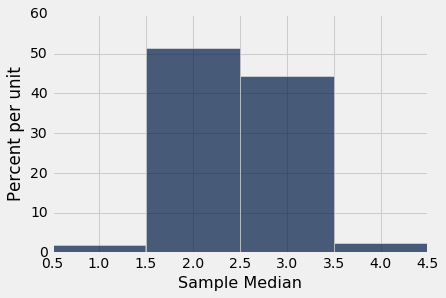

In [51]:
Table().with_column('Sample Median', medians).hist(bins=np.arange(0.5, 5, 1))

You can see that the sample median is very likely to be close to 2, which was the value of the population median. Since samples of 1000 flight delays are likely to resemble the population of delays, it is not surprising that the median delays of those samples should be close to the median delay in the population.

This is an example of how a statistic can provide a good estimate of a parameter.

### The Power of Simulation ###

If we could generate all possible random samples of size 1000, we would know all possible values of the statistic (the sample median), as well as the probabilities of all those values. We could visualize all the values and probabilities in the probability histogram of the statistic.

But in many situations (including this one), the number of all possible samples is large enough to exceed the capacity of the computer, and purely mathematical calculations of the probabilities can be intractably difficult.

This is where empirical histograms come in.

We know that by the Law of Averages, the empirical histogram of the statistic is likely to resemble the probability histogram of the statistic, if the sample size is large and if you repeat the sampling process numerous times.

This means that simulating random processes repeatedly is a way of approximating probability distributions *without figuring out the probabilities mathematically or generating all possible random samples*. Thus computer simulations become a powerful tool in data science. They can help data scientists understand the properties of random quantities that would be complicated to analyze in other ways.

Here is a classical example of such a simulation.

### Estimating the number of enemy aircraft ###

In World War II, data analysts working for the Allies were tasked with estimating the number of German warplanes. The data included the serial numbers of the German planes that had been observed by Allied forces. These serial numbers gave the data analysts a way to come up with an answer.

To create an estimate of the total number of warplanes, the data analysts had to make some assumptions about the serial numbers. Here are two such assumptions, greatly simplified to make our calculations easier.

1. There are N planes, numbered $1, 2, ... , N$. 

2. The observed planes are drawn uniformly at random with replacement from the $N$ planes.

The goal is to estimate the number $N$. That's the unknown parameter.

Suppose you observe some planes and note down their serial numbers. How might you use the data to guess the value of $N$? A natural and straightforward statistic to use as an estimate would simply be the **largest serial number observed**.

Let us see how well this statistic works as an estimate. But first, another simplification: Some historians now estimate that the German aircraft industry produced almost 100,000 warplanes of many different kinds, But here we will imagine just one kind. That makes Assumption 1 above easier to justify.

Suppose there are in fact $N = 300$ planes of this kind, and that you observe 30 of them. We can construct a table called ``serialno`` that contains the serial numbers 1 through $N$. We can then sample 30 times with replacement (see Assumption 2) to get our sample of serial numbers. Our statistic is the maximum of these 30 numbers. That's what we will use as our estimate of the parameter $N$.

In [34]:
N = 300
serialno = Table().with_column('serial Number', np.arange(1, N+1))
serialno

serial number
1
2
3
4
5
6
7
8
9
10


In [61]:
serialno.sample(30).column(0).max()

291

As with all code involving random sampling, run the cell a few times to see the variation. You will observe that even with just 30 observations from among 300, the largest serial number is typically in the 250-300 range. 

In principle, the largest serial number could be as small as 1, if you were unlucky enough to see Plane Number 1 all 30 times. And it could be as large as 300 if you observe Plane Number 300 at least once. But usually, it seems to be in the very high 200's. It appears that if you use the largest observed serial number as your estimate of the total, you will not be very far wrong.

### Simulating the Statistic ###

Let us simulate the statistic to see if we can confirm this. The steps of the simulation are:

**Step 1.** Sample 30 times at random with replacement from 1 through 300 and note the largest number observed. That's the statistic.

**Step 2.** Repeat Step 1 750 times, sampling afresh each time. You can replace 750 by any other large number.

**Step 3.** Create a table to display the 750 observed values of the statistic, and use the values to draw an empirical histogram of the statistic.

In [62]:
sample_size = 30
repetitions = 750

In [64]:
maxes = make_array()

for i in np.arange(repetitions):
    sampled_numbers = serialno.sample(sample_size)
    maxes = np.append(maxes, sampled_numbers.column(0).max())  

Table().with_column('Max Serial Number', maxes)

Max Serial Number
280
253
294
299
298
237
296
297
293
295


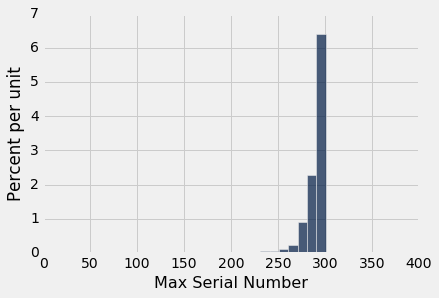

In [65]:
every_ten = np.arange(1, N+100, 10)
Table().with_column('Max Serial Number', maxes).hist(bins = every_ten)

This is a histogram of the 750 estimates, each of which is an observed value of the statistic "largest serial number observed." 

As you can see, the estimates are all crowded up near 300, even though in theory they could be much smaller. The histogram indicates that as an estimate of the total number of planes, the largest serial number might be too low by about 10 to 25. But it is extremely unlikely to be underestimate the true number of planes by more than about 50.

### A Good Approximation ###

As we noted earlier, if you generate *all* of the possible samples, and compute the statistic for each of them, then you will have an accurate picture of how different the statistic might have been. Indeed, you will have a complete enumeration of all the possible values of the statistic and all their probabilities.

In other words, you will have the probability distribution of the statistic, and its probability histogram.

The probability distribution of a statistic is also called the *sampling distribution* of the statistic, because it is based on all of the possible samples.

But, as we have also noted above, the total number of possible samples is often very large. For example, the total number of possible sequences of 30 serial numbers that you could see if there were 300 aircraft is

In [54]:
300**30

205891132094649000000000000000000000000000000000000000000000000000000000000

That's a lot of samples. Fortunately, we don't have to generate all of them. We know that the empirical histogram of the statistic, based on many but not all of the possible samples, is a good approximation to the probability histogram. Thus the empirical distribution of a statistic gives a good idea of how different the statistic could be.

It is true that the probability distribution of a statistic contains more accurate information about the statistic than an empirical distribution does. 
But often, as in this example, the approximation provided by the empirical distribution is sufficient for data scientists to understand how much a statistic can vary. And empirical distributions are easier to compute, if you have a computer. Therefore, data scientists often use empirical distributions instead of exact probability distributions when they are trying to understand the properties of a statistic.

### A Different Estimate of the Parameter ###

Here is an example to illustrate this point. Thus far, we have used the largest observed serial number as an estimate of the total number of planes. But there are other possible estimates, and we will now consider one of them. 

The idea underlying this estimate is that the *average* of the observed serial numbers is likely be about halfway between 1 and $N$. Thus, if $A$ is the average, then

$$
A ~ \approx ~ \frac{N}{2} ~~~ \mbox{and so} ~~~ N \approx 2A
$$

Thus a new statistic can be used to estimate the total number of planes: take the average of the observed serial numbers and double it.

How does this method of estimation compare with using the largest number observed? It is not easy to calculate the probability distribution of the new statistic. But as before, we can simulate it to get the probabilities approximately. Let's take a look at the empirical distributions of both statistics based on repeated sampling. The number of repetitions is chosen to be 750, the same as it was in the earlier simulation, for ease of comparison.

In [59]:
maxes = make_array()
twice_ave = make_array()

for i in np.arange(repetitions):
    sampled_numbers = serialno.sample(sample_size)
    
    new_max = sampled_numbers.column(0).max()
    maxes = np.append(maxes, new_max)
    
    new_twice_ave = 2*np.mean(sampled_numbers.column(0))
    twice_ave = np.append(twice_ave, new_twice_ave)
    
    
results = Table().with_columns(
    'Repetition', np.arange(1, repetitions+1),
    'Max', maxes,
    '2*Average', twice_ave
)

results

Repetition,Max,2*Average
1,296,312.067
2,283,290.133
3,290,250.667
4,296,306.8
5,298,335.533
6,281,240
7,300,317.267
8,295,322.067
9,296,317.6
10,299,308.733


Notice that unlike the largest number observed, the new estimate ("twice the average") can overestimate the number of planes. This will happen when the average of the observed serial numbers is closer to $N$ than to 1.

The histograms below show the empirical distributions of both estimates.

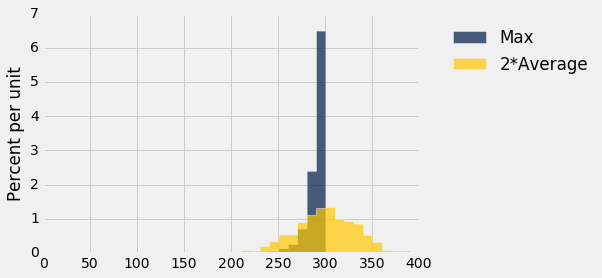

In [60]:
results.drop(0).hist(bins = every_ten)

You can see that the old method almost always underestimates; formally, we say that it is *biased*. But it has low variability, and is highly likely to be close to the true total number of planes. 

The new method overestimates about as often as it underestimates, and thus is roughly *unbiased* on average in the long run. However, it is more variable than the old estimate, and thus is prone to larger absolute errors.

This is an instance of a *bias-variance tradeoff* that is not uncommon among competing estimates. Which estimate you decide to use will depend on the kinds of errors that matter the most to you. In the case of enemy warplanes, underestimating the total number might have grim consequences, in which case you might choose to use the more variable method that overestimates about half the time. On the other hand, if overestimation leads to high costs of needlessly guarding against planes that don't exist, you might be satisfied with the method that underestimates by a modest amount. 

### Technical Note ###

In fact, "twice the average" is not unbiased. On average, it overestimates by exactly 1. For example, if `N` is 3, the average of draws from 1, 2, and 3 will be 2, and 2 times 2 is 4, which is one more than `N`. "Twice the average" minus 1 is an unbiased estimator of `N`.